# 1. General Data

**Hinton diagram**<br>
The color of the boxes determines the sign of the correlation<br> 
*Red* - positive correlation<br>
*Blue* - negative correlation<br>
*Size* of box - magnitude of the correlation<br>


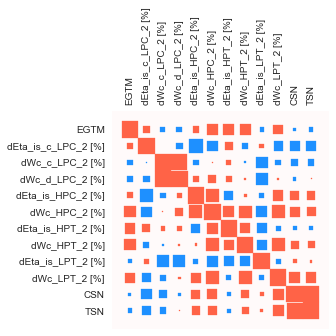

In [11]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

df = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx',
                   'Sheet6')
corrmat = df.corr()
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('snow')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'tomato' if w > 0 else 'dodgerblue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corrmat)


In [13]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = df.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)
mosthighlycorrelated(df, 10)

,FirstVariable,SecondVariable,Correlation
0,dWc_c_LPC_2 [%],dWc_d_LPC_2 [%],0.931060
1,CSN,TSN,0.922649
2,dEta_is_c_LPC_2 [%],dEta_is_HPC_2 [%],-0.665744
3,dWc_HPC_2 [%],dWc_LPT_2 [%],0.630054
4,dEta_is_HPC_2 [%],dWc_HPC_2 [%],0.604044
5,dWc_HPC_2 [%],dWc_HPT_2 [%],0.589334
6,dWc_HPT_2 [%],dWc_LPT_2 [%],0.586558
7,dWc_d_LPC_2 [%],dEta_is_LPT_2 [%],-0.520231
8,dWc_c_LPC_2 [%],dEta_is_LPT_2 [%],-0.511589
9,dWc_LPT_2 [%],CSN,0.466323


# 2. Above average [EGTM=>36]

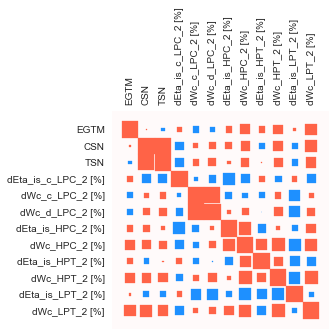

In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

df2 = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx',
                   'Sheet7')
corrmat = df2.corr()
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('snow')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'tomato' if w > 0 else 'dodgerblue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corrmat)

In [16]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = df.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)
mosthighlycorrelated(df2, 10)

,FirstVariable,SecondVariable,Correlation
0,CSN,TSN,0.945832
1,dWc_c_LPC_2 [%],dWc_d_LPC_2 [%],0.920409
2,dWc_HPC_2 [%],dWc_HPT_2 [%],0.649509
3,dWc_HPT_2 [%],dWc_LPT_2 [%],0.614624
4,dEta_is_HPC_2 [%],dWc_HPC_2 [%],0.564492
5,dEta_is_c_LPC_2 [%],dEta_is_HPC_2 [%],-0.549053
6,CSN,dWc_LPT_2 [%],0.524864
7,dWc_HPC_2 [%],dWc_LPT_2 [%],0.516361
8,dWc_HPC_2 [%],dEta_is_LPT_2 [%],-0.505477
9,dWc_HPT_2 [%],dEta_is_LPT_2 [%],-0.500531


# 3. Below average [EGTM=<27]

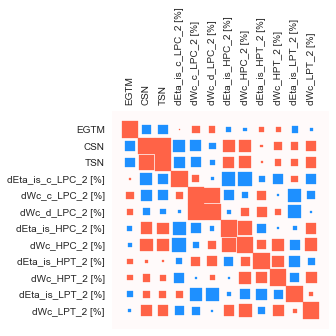

In [17]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

df3 = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx',
                   'Sheet8')
corrmat = df3.corr()
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('snow')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'tomato' if w > 0 else 'dodgerblue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corrmat)

In [18]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = df.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)
mosthighlycorrelated(df3, 10)

,FirstVariable,SecondVariable,Correlation
0,CSN,TSN,0.945832
1,dWc_c_LPC_2 [%],dWc_d_LPC_2 [%],0.920409
2,dWc_HPC_2 [%],dWc_HPT_2 [%],0.649509
3,dWc_HPT_2 [%],dWc_LPT_2 [%],0.614624
4,dEta_is_HPC_2 [%],dWc_HPC_2 [%],0.564492
5,dEta_is_c_LPC_2 [%],dEta_is_HPC_2 [%],-0.549053
6,CSN,dWc_LPT_2 [%],0.524864
7,dWc_HPC_2 [%],dWc_LPT_2 [%],0.516361
8,dWc_HPC_2 [%],dEta_is_LPT_2 [%],-0.505477
9,dWc_HPT_2 [%],dEta_is_LPT_2 [%],-0.500531


# 4. Regular [28<=EGTM<=35]

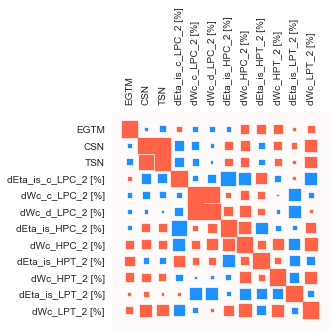

In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from scipy import stats

df4 = pd.read_excel('//kl1015cy/home$/klm76343/Desktop/000 Thesis/01 KLM/01 Documents/02 EXCEL/010 Statistics_bewteen_model_cases.xlsx',
                   'Sheet9')
corrmat = df4.corr()
def hinton(matrix, max_weight=None, ax=None):
    """Draw Hinton diagram for visualizing a weight matrix."""
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2**np.ceil(np.log(np.abs(matrix).max())/np.log(2))

    ax.patch.set_facecolor('snow')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in np.ndenumerate(matrix):
        color = 'tomato' if w > 0 else 'dodgerblue'
        size = np.sqrt(np.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    nticks = matrix.shape[0]
    ax.xaxis.tick_top()
    ax.set_xticks(range(nticks))
    ax.set_xticklabels(list(matrix.columns), rotation=90)
    ax.set_yticks(range(nticks))
    ax.set_yticklabels(matrix.columns)
    ax.grid(False)

    ax.autoscale_view()
    ax.invert_yaxis()

hinton(corrmat)

In [20]:
def mosthighlycorrelated(mydataframe, numtoreport):
    # find the correlations
    cormatrix = df.corr()
    # set the correlations on the diagonal or lower triangle to zero,
    # so they will not be reported as the highest ones:
    cormatrix *= np.tri(*cormatrix.values.shape, k=-1).T
    # find the top n correlations
    cormatrix = cormatrix.stack()
    cormatrix = cormatrix.reindex(cormatrix.abs().sort_values(ascending=False).index).reset_index()
    # assign human-friendly names
    cormatrix.columns = ["FirstVariable", "SecondVariable", "Correlation"]
    return cormatrix.head(numtoreport)
mosthighlycorrelated(df3, 10)

,FirstVariable,SecondVariable,Correlation
0,CSN,TSN,0.945832
1,dWc_c_LPC_2 [%],dWc_d_LPC_2 [%],0.920409
2,dWc_HPC_2 [%],dWc_HPT_2 [%],0.649509
3,dWc_HPT_2 [%],dWc_LPT_2 [%],0.614624
4,dEta_is_HPC_2 [%],dWc_HPC_2 [%],0.564492
5,dEta_is_c_LPC_2 [%],dEta_is_HPC_2 [%],-0.549053
6,CSN,dWc_LPT_2 [%],0.524864
7,dWc_HPC_2 [%],dWc_LPT_2 [%],0.516361
8,dWc_HPC_2 [%],dEta_is_LPT_2 [%],-0.505477
9,dWc_HPT_2 [%],dEta_is_LPT_2 [%],-0.500531
